** Import numpy, pandas, visualization libraries and set %matplotlib inline. **

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

** Read in the csv file as a dataframe called df. **

In [2]:
df = pd.read_csv('911.csv')

** Check the info() of the df. **

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df. **

In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


** What are the top 5 zipcodes (zip) for 911 calls? **

In [5]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [6]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** How many unique title codes are there? **

In [7]:
df['title'].nunique()

110

** Create a new column called "reason" based on the "title" column. **

In [8]:
df['reason'] = df['title'].apply(lambda title: title.split(':')[0])

** What is the most common reason for a 911 call **

In [9]:
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

** Countplot of 911 calls by reason. **

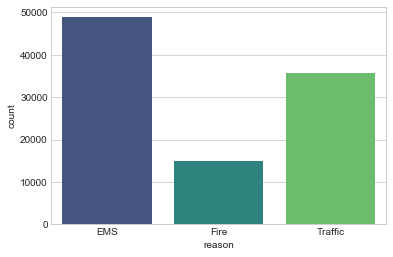

In [10]:
sns.countplot(x='reason',data=df,palette='viridis')

** What is the data type of the objects in the "timeStamp" column? **

In [12]:
type(df['timeStamp'].iloc[0])

str

** Convert the column from strings to DateTime objects. **

In [13]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

** Create 3 new columns called "hour", "month", and "day of week". **

In [15]:
df['hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['month'] = df['timeStamp'].apply(lambda time: time.month)
df['day of week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

** Map the actual string names to the day of the week. **

In [18]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [19]:
df['day of week'] = df['day of week'].map(dmap)

** Create a countplot of the "day of week" column with the hue based off of the "reason" column. **

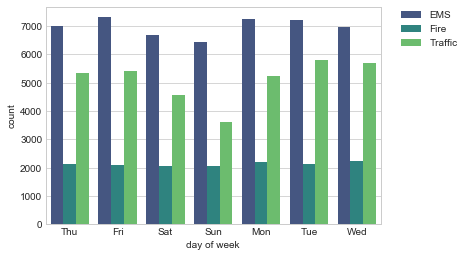

In [27]:
sns.countplot(x='day of week',hue='reason',data=df,palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

** Create a countplot of the "month" column with the hue based off of the "reason" column. **

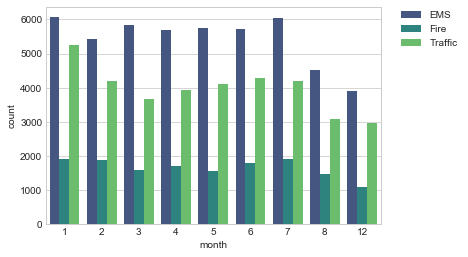

In [29]:
sns.countplot(x='month',hue='reason',data=df,palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend

Notice that months 9, 10, 11 are missing.

** Create a gropuby object called byMonth and use the count() method for aggregation. **

In [31]:
byMonth = df.groupby('month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day of week
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


** Create a simple plot indicating the count of calls per month. **

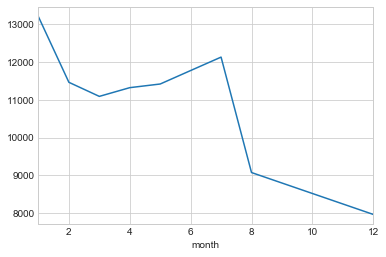

In [32]:
byMonth['twp'].plot()

** Create a linear fit on the number of calls per month. **

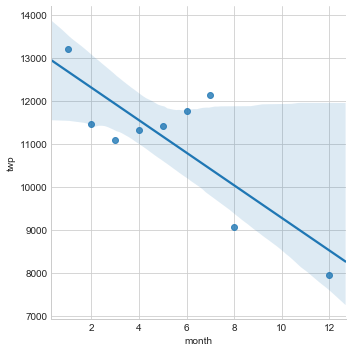

In [34]:
sns.lmplot(x='month',y='twp',data=byMonth.reset_index())

** Create a new column called "date" that contains the date from the timeStamp column. **

In [36]:
df['date']=df['timeStamp'].apply(lambda t: t.date())

** Groupby the "date" column with the count() aggregate and create a plot of counts of 911 calls. **

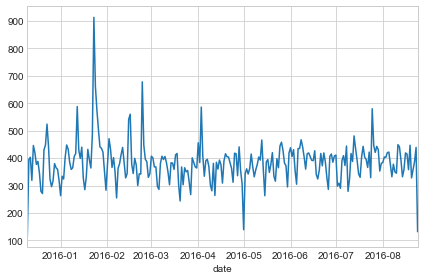

In [46]:
df.groupby('date').count()['twp'].plot()
plt.tight_layout()

** Create 3 separate plots with each plot representing a reason for the 911 call grouping by "date". **

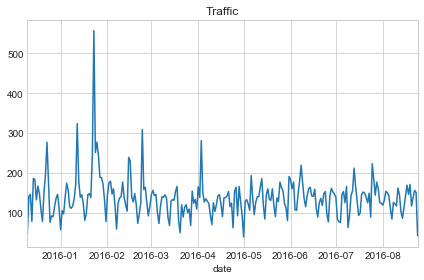

In [48]:
df[df['reason']=='Traffic'].groupby('date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

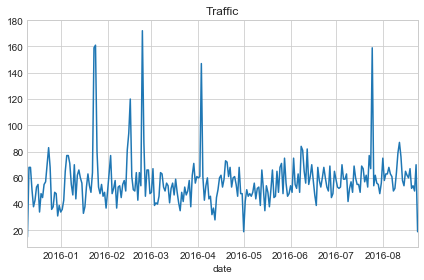

In [50]:
df[df['reason']=='Fire'].groupby('date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

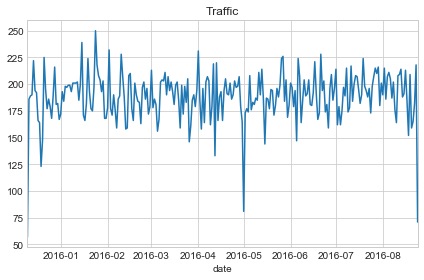

In [51]:
df[df['reason']=='EMS'].groupby('date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

**  Restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. **

In [52]:
dayHour = df.groupby(by=['day of week','hour']).count()['reason'].unstack()
dayHour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day of week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** Create a heat map using the new DataFrame. **

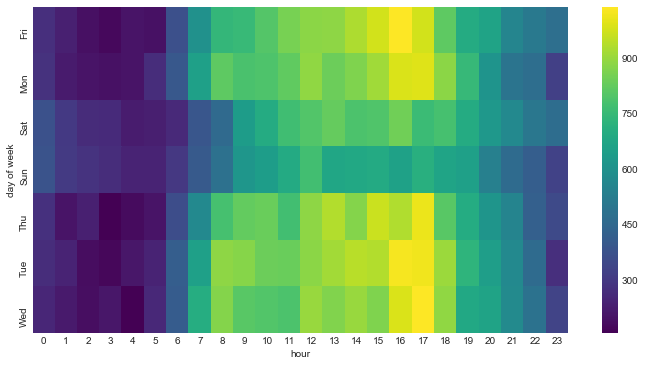

In [53]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

** Create a cluster map using the new DataFrame. **

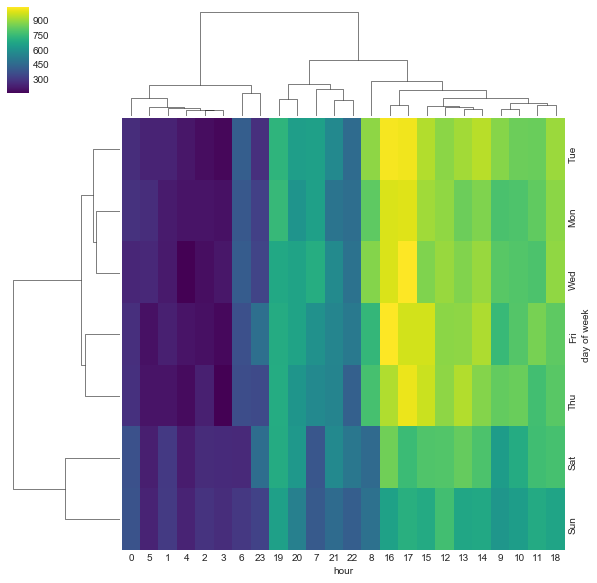

In [54]:
sns.clustermap(dayHour,cmap='viridis')

** Restructure the dataframe so that the columns become the Hours and the Index becomes Month. **

In [55]:
dayMonth = df.groupby(by=['day of week','month']).count()['reason'].unstack()
dayMonth.head()

month,1,2,3,4,5,6,7,8,12
day of week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


** Create a heat map using the new DataFrame. **

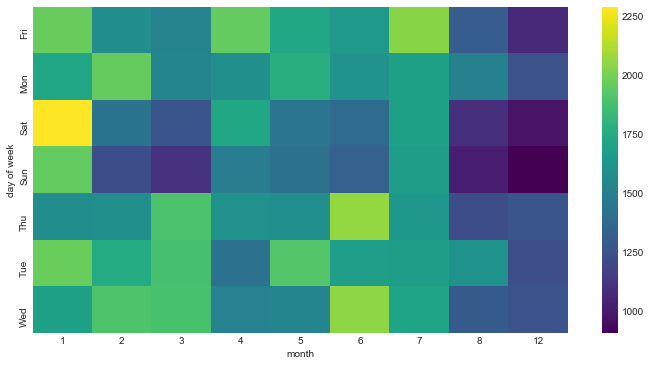

In [57]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

** Create a cluster map using the new DataFrame. **

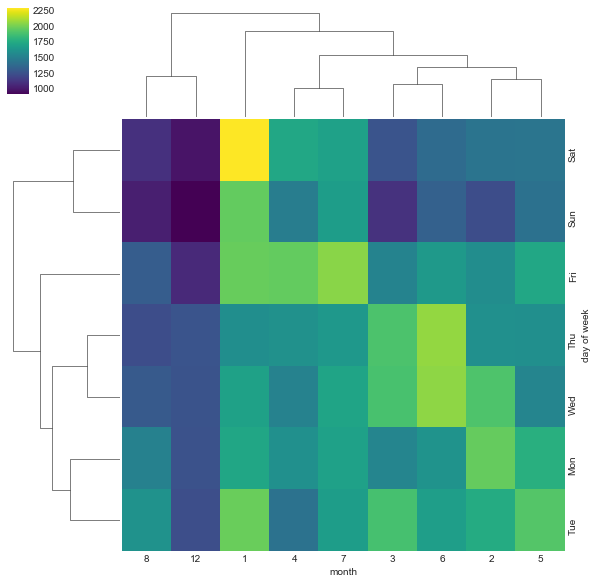

In [58]:
sns.clustermap(dayMonth,cmap='viridis')